# Гарапко Даниил, группа 858641

# Лабораторная работа №7 “Метод главных компонент”

In [0]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from scipy.io import loadmat
from scipy.spatial import distance
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import random
from PIL import Image

## Task 1

Набор данных ex7data1.mat представляет собой файл формата *.mat
(т.е. сохраненного из Matlab). Набор содержит две переменные X<sub>1</sub> и X<sub>2</sub> -
координаты точек, для которых необходимо выделить главные компоненты

1. Загрузите данные ex7data1.mat из файла.

In [0]:
task1_file_name = "Data\Lab 7\ex7data1.mat"
mat = loadmat(task1_file_name)  # load mat-file
X = mat['X']
df_task1 = pd.DataFrame(X)

NameError: name 'loadmat' is not defined

2. Постройте график загруженного набора данных.

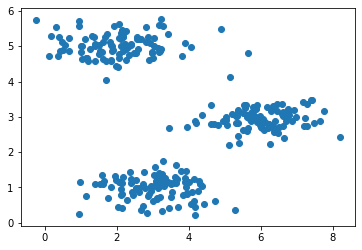

In [0]:
plt.scatter(X[:, 0], X[:, 1], cmap='winter')
plt.show()

3. Реализуйте функцию вычисления матрицы ковариации данных.

In [0]:
mu = np.mean(X,axis=0)
m=len(X)

In [0]:
mu,m

(array([3.68437558, 2.9871008 ]), 300)

In [0]:
covariance_matrix = (1/(m-1))*np.dot((X-mu).T,(X-mu))

In [0]:
covariance_matrix

array([[ 3.70785242, -0.71971574],
       [-0.71971574,  2.83948778]])

In [0]:
covariance_matrix = df.cov()

In [0]:
covariance_matrix

,0,1
0,3.707852,-0.719716
1,-0.719716,2.839488


In [0]:
np.cov(X)

array([[ 3.70785242, -0.71971574],
       [-0.71971574,  2.83948778]])

4. Вычислите координаты собственных векторов для набора данных с
помощью сингулярного разложения матрицы ковариации (разрешается
использовать библиотечные реализации матричных разложений).

In [0]:
eigvals, eigvecs = np.linalg.eig(covariance_matrix)

In [0]:
eigvals,eigvecs

(array([4.11420864, 2.43313156]), array([[ 0.8707906 ,  0.49165407],
        [-0.49165407,  0.8707906 ]]))

5. Постройте на графике из пункта 2 собственные векторы матрицы
ковариации

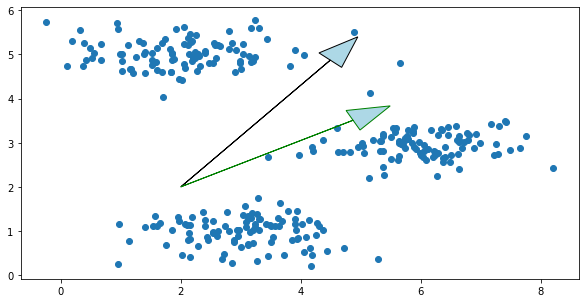

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.arrow(2.0, 2.0, 2.0+0.49165407, 2.0+0.8707906 , head_width=0.5, head_length=0.7, fc='lightblue', ec='black')
ax.arrow(2.0, 2.0, 2.0+0.8707906, 2.0-0.49165407, head_width=0.5, head_length=0.7, fc='lightblue', ec='green')
plt.scatter(X[:, 0], X[:, 1], cmap='winter')
plt.show()

6. Реализуйте функцию проекции из пространства большей размерности в
пространство меньшей размерности с помощью метода главных
компонент.

7. Реализуйте функцию вычисления обратного преобразования.

8. Постройте график исходных точек и их проекций на пространство
меньшей размерности (с линиями проекций).